In [0]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.special import binom
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

In [0]:
class MarsiliCurty(object):
    
    def __init__(self, N, z, p, m):
        self.N_fund = int(N * z)
        self.N_follow = N - self.N_fund
        self.N = N
        self.p = p
        self.m = m
        self.opinion = np.empty(N)
        self.opinion[:self.N_fund] = np.random.choice([-1,1],
                                                      p = [1-p,p],
                                                      size = self.N_fund)
        self.opinion[self.N_fund:] = np.random.choice([-1,1],
                                                   p = [0.5, 0.5],
                                                  size = self.N_follow)
    
    def global_opinion(self):
        return np.mean(self.opinion)

    
    def followers_opinion(self):
        return np.mean(self.opinion[self.N_fund:])

    def compute_q(self):
        return 0.5 * (self.followers_opinion() + 1)
    
    def compute_pi(self):
        return 0.5 * (self.global_opinion() + 1)
            
    def time_step(self):
        random_follower = np.random.randint(low = self.N_fund, high = self.N)
        group = np.random.choice(self.N, size = self.m)
        group_opinions = self.opinion[group]
        avg_group_opinion = np.mean(group_opinions)
        self.opinion[random_follower] = np.sign(avg_group_opinion)
        
        
    def iterate(self,T):
        q = np.empty(T)
        pi = np.empty(T)
        for t in range(T):
            q[t] = self.compute_q()
            pi[t] = self.compute_pi()
            self.time_step()
        return q, pi 

In [3]:
N = 300
z = 0.3
p = 0.6
m = 12

MC = MarsiliCurty(N, z, p, m)
print("Fraction of people who are right:", MC.compute_pi())
print("Fraction of followers who are right", MC.compute_q())

Fraction of people who are right: 0.5266666666666666
Fraction of followers who are right 0.48095238095238096


In [4]:
%time q, pi = MC.iterate(4000)

CPU times: user 304 ms, sys: 0 ns, total: 304 ms
Wall time: 311 ms


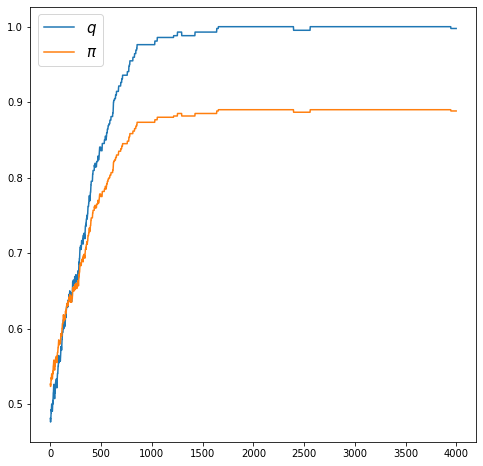

In [8]:
plt.figure(figsize = (8,8))
plt.plot(q, label='$q$')
plt.plot(pi, label=r'$\pi$')
plt.legend(fontsize = 15)

In [0]:
def get_pi(z, m = 10, N = 300, p =0.55):
    MC = MarsiliCurty(N, z, p, m)
    q, pi = MC.iterate(4000)
    return np.mean(pi[:-100])

In [0]:
zs = np.linspace(0,1, 100, endpoint = False)

In [11]:
pis = [get_pi(z, N = 300) for z in tqdm(zs)]

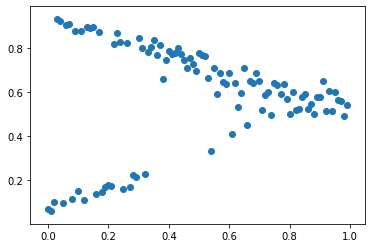

In [12]:
plt.scatter(zs, pis)